In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
n_image = 1000


def save_Q(Q):
    global n_image
#    print(Q)
    image = np.zeros((500,500))
    for idx in range(25):
        i = int(idx / 7)
        j = idx % 7
        v = max(Q[idx])
        z = (v + 1000) / 1500
        if z < 0:
            z = 0
        if z > 1:
            z = 1
        for k in range(100):
            for l in range(100):
                image[i*100+k][j*100+l] = z
    image = 255 * image 
    img = image.astype(np.uint8)
    cv2.imshow("image", img)
    cv2.waitKey(10)
#   uncomment for output
    cv2.imwrite(f"pic_{n_image}.jpg", img)
    n_image = n_image + 1


def execute_action(maze, s, a):
    sp = [0,0]
    sp[0] = s[0] + a[0]
    sp[1] = s[1] + a[1]

    isp = sp[0] * 7 + sp[1]
    idxs = s[0] * 7 + s[1]
    if (sp[0] < 0) or (sp[1]<0) or (sp[0] >= 7) or (sp[1] >= 7):
        return idxs, -100, False
    if maze[sp[0]][sp[1]] == 0:
        return isp, -1, False
    elif maze[sp[0]][sp[1]] == 1:
        return idxs, -100, False
    elif maze[sp[0]][sp[1]] == 10:
        return isp, 500, True
    print(f"Should not happen {s} {sp} {a} {maze}")
    sys.exit(1)

#
#  Q[state, action]  state is row major version of the 5x5 map, actions are [0,1], [1,0], [0,-1], [-1, 0] 
#  in row col
#
def init_Q():
    Q = []
    for i in range(49):
        x = [0, 0, 0, 0]
        Q.append(x)
    return Q

def reset():
     return 0

def state_to_row_col(s):
     return [int(s / 7), s % 7]


def q_learning(maze, actions, n_episodes=300, max_episode_length=50, epsilon=0.1, 
               alpha=0.2, gamma=0.7, decayValue=1.00, epsilon0 = 0.8, isQ3 = False, 
               p = 0 
               ):
    rewards = []

    Q = init_Q()
    for e in range(n_episodes):
        s = reset()
        reward = 0
        if not isQ3:
            epsilon *= decayValue
        else:
            epsilon = decayValue**e * epsilon + epsilon0
        
        
        for t in range(max_episode_length): 
                                                    # Let p represent the stochastic motion 
            if np.random.uniform(0,1) < epsilon or np.random.uniform(0,1) < p:
                a = np.random.randint(4)
            else:
                a = np.argmax(Q[s])
            
            temp = state_to_row_col(s)
            sp, R, done = execute_action(maze, temp, actions[a])
            
            
            Q[s][a] = (1 - alpha) * Q[s][a] + alpha * (R + gamma * max(Q[sp]))
            reward = reward + R
            if done:
                break
            s = sp
        rewards.append(reward)
        # save_Q(Q)
    return rewards, Q

    
#
# define the maze 0 = unoocuped, 1 = wall, 10 = goal
#
maze = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0],
    [1, 10, 0, 0, 0, 0, 0],
    ]
    )

actions = [[0,1], [1,0], [0,-1], [-1, 0]]





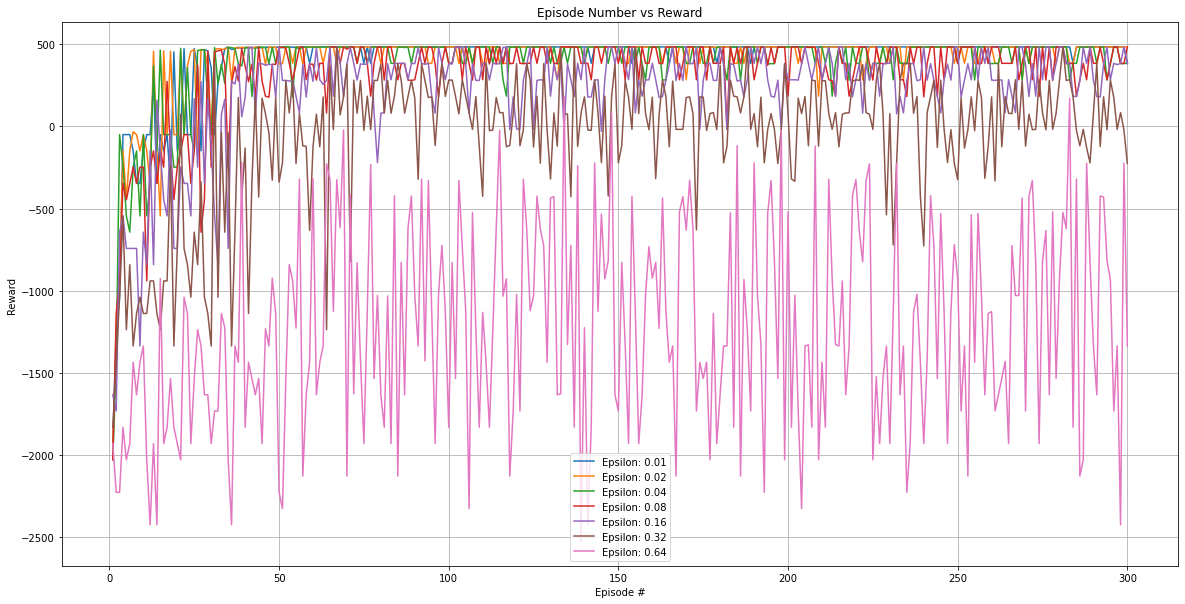

In [3]:

# 0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64 
epList = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64]
plt.figure(figsize=(20,10 )) 
for ep in epList:
    rewards, q = q_learning(maze, actions, epsilon = ep)
    plt.plot(np.arange(1, 301), np.array(rewards),label=f"Epsilon: {ep}" , linestyle='-' )

plt.xlabel('Episode #')
plt.ylabel('Reward')
plt.title('Episode Number vs Reward')
plt.legend()
plt.grid(True)


plt.show()


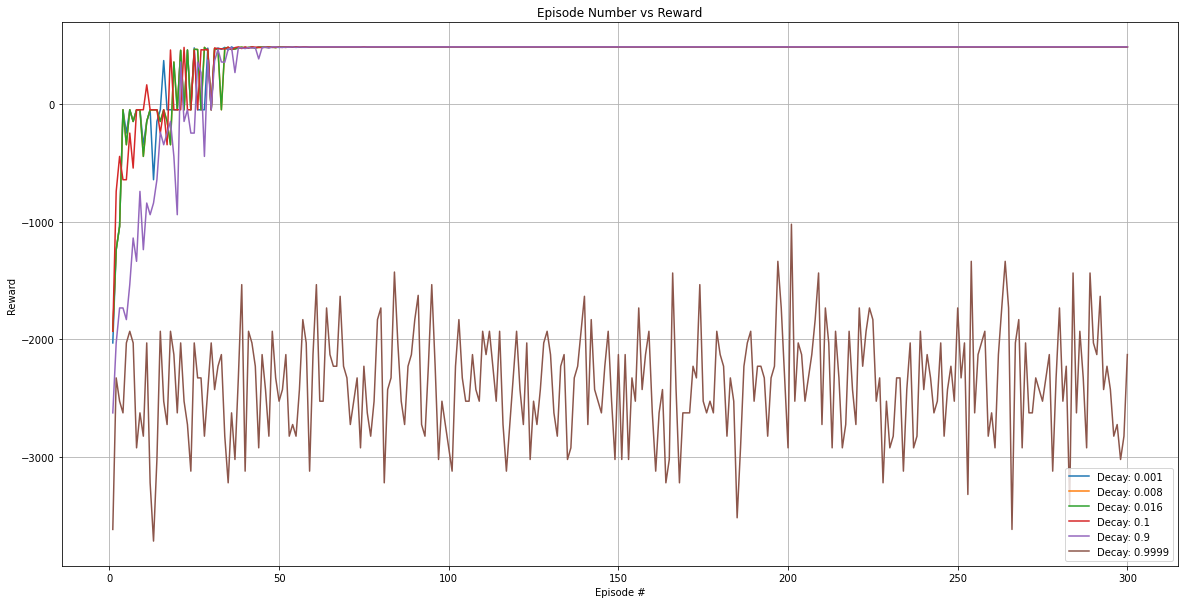

In [4]:
decayValues = [0.001, 0.008, 0.016, 0.1, 0.9,0.9999]
plt.figure(figsize=(20,10 )) 
for decay in decayValues:
    rewards, q = q_learning(maze, actions, epsilon = 0.9, decayValue=decay)
    plt.plot(np.arange(1, 301), np.array(rewards),label=f"Decay: {decay}" , linestyle='-' )

plt.xlabel('Episode #')
plt.ylabel('Reward')
plt.title('Episode Number vs Reward')
plt.legend()
plt.grid(True)


plt.show()


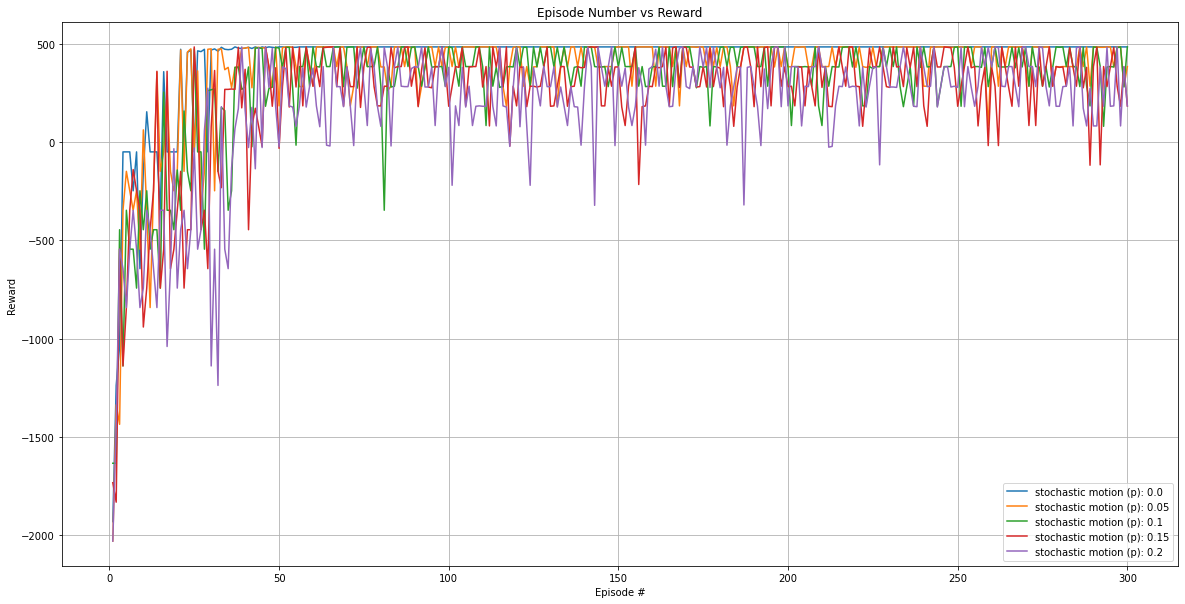

In [7]:

stochasticMotion = [0.0,0.05,0.10,0.15,0.20]
plt.figure(figsize=(20,10 )) 
for sm in stochasticMotion:
    rewards, q = q_learning(maze, actions, epsilon = 0.001, p = sm)
    plt.plot(np.arange(1, 301), np.array(rewards),label=f"stochastic motion (p): {sm}" , linestyle='-' )

plt.xlabel('Episode #')
plt.ylabel('Reward')
plt.title('Episode Number vs Reward')
plt.legend()
plt.grid(True)


plt.show()
